In [22]:
import os
import glob
import numpy as np
import cv2
import math
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
from tqdm import trange, tqdm
import random
from sklearn.metrics import r2_score as r2_
def plot_parity(filename, loss_rate,true, pred, rmse_, mae_, kind="scatter", 
                xlabel="true", ylabel="predict", title="Loss 50-60%", 
                hist2d_kws=None, scatter_kws=None, kde_kws=None,
                equal=True, metrics=True, metrics_position="lower right",
                figsize=(8, 8), ax=None, save_file = True,):
    
    if not ax:
        fig, ax = plt.subplots(figsize=figsize)

    # data range
    val_min = min(true.min(), pred.min())
    val_max = max(true.max(), pred.max())

    # data plot
    if "scatter" in kind:
        if not scatter_kws:
            scatter_kws={'color':'green', 'alpha':0.5}
        ax.scatter(true, pred, s = 1, **scatter_kws)
    elif "hist2d" in kind:
        if not hist2d_kws:
            hist2d_kws={'cmap':'Greens', 'vmin':1}
        ax.hist2d(true, pred, **hist2d_kws)
    elif "kde" in kind:
        if not kde_kws:
            kde_kws={'cmap':'viridis', 'levels':5}
        sns.kdeplot(x=true, y=pred, **kde_kws, ax=ax)

    # x, y bounds
    xbounds = ax.get_xbound()
    ybounds = ax.get_ybound()
    max_bounds = [min(xbounds[0], ybounds[0]), max(xbounds[1], ybounds[1])]
    ax.set_xlim(max_bounds)
    ax.set_ylim(max_bounds)

    # x, y ticks, ticklabels
    y = ax.get_yticks()
    ticks = [round(y[i],3) for i in range (len(y)) if not y[i]<0 and i%2==1]
    ax.set_xticks(ticks)
    ax.set_xticklabels(ticks, fontsize=15)
    ax.set_yticks(ticks)
    ax.set_yticklabels(ticks, fontsize=15)

    # grid
    ax.grid(True)

    # 기준선
    ax.plot(max_bounds, max_bounds, c="k", alpha=0.3)

    # x, y label
    font_label = {"color":"gray", "fontsize":20}
    ax.set_xlabel(xlabel, fontdict=font_label, labelpad=8)
    ax.set_ylabel(ylabel, fontdict=font_label, labelpad=8)

    # title
    font_title = {"color": "gray", "fontsize":20, "fontweight":"bold"}
    ax.set_title(title, fontdict=font_title, pad=16)

    # metrics
    if metrics:
        #rmse = mean_squared_error(true, pred, squared=False)
        #mae = mean_absolute_error(true, pred)
        #r2 = r2_score(true, pred)
        rmse = rmse_
        mae = mae_
        r2 = r2_(true, pred)
        #r2 = r2_
        font_metrics = {'color':'k', 'fontsize':14}

        if metrics_position == "lower right":
            text_pos_x = 0.98
            text_pos_y = 0.3
            ha = "right"
        elif metrics_position == "upper left":
            text_pos_x = 0.1
            text_pos_y = 0.9
            ha = "left"
        else:
            text_pos_x, text_pos_y = 0.1 #text_position
            ha = "left"

        ax.text(text_pos_x, text_pos_y, f"RMSE = {rmse:.8f}", 
                transform=ax.transAxes, fontdict=font_metrics, ha=ha)
        ax.text(text_pos_x, text_pos_y-0.1, f"MAE = {mae:.8f}", 
                transform=ax.transAxes, fontdict=font_metrics, ha=ha)
        ax.text(text_pos_x, text_pos_y-0.2, f"R2 = {r2:.3f}", 
                transform=ax.transAxes, fontdict=font_metrics, ha=ha)

    # 파일로 저장
    fig = ax.figure
    fig.tight_layout()
    if save_file:
        fig.savefig(filename+f'/{loss_rate}.png')
    plt.show()
    return ax




In [27]:
step = input()
loss_rate = 30

####current
goci_path = f'/home/ubuntu/문서/AY_RFR/model/results/chl_only_range2/{step}/{loss_rate}/degree/recon'    #복원
modis_path = f'/home/ubuntu/문서/AY_RFR/model/results/chl_only_range2/{step}/{loss_rate}/degree/gt'           #gt
mask_path = f'/home/ubuntu/문서/AY_RFR/model/results/chl_only_range2/{step}/{loss_rate}/degree/mask'    #mask
save_path = f'/home/ubuntu/문서/AY_RFR/model/performance/chl_only_range2/goci_to_goci/{step}/{loss_rate}'
#####

time_range = 2
if not os.path.isdir(save_path):
    os.makedirs(save_path)

1800000


In [28]:

modis_files_list = sorted(list(glob.glob(os.path.join(modis_path, '*'), recursive=True)))
#modis_files_list = modis_files_list.sort()
goci_files_list = sorted(list(glob.glob(os.path.join(goci_path, '*'), recursive=True)))
#goci_files_list = goci_files_list.sort()
mask_files_list = sorted(list(glob.glob(os.path.join(mask_path, '*'), recursive=True)))
#mask_files_list = mask_files_list.sort()
#print(mask_files_list)
print("len(modis_files_list):", len(modis_files_list))
print("len(goci_files_list):", len(goci_files_list))
print("len(mask_files_list):", len(mask_files_list))
temp_rmspe =0
temp_mae = 0
temp_mape = 0
temp_rmse = 0
cloud_count = 0
outlier = 0
temp_mse = 0 
tmp = 0
cnt = 0


len(modis_files_list): 932
len(goci_files_list): 932
len(mask_files_list): 932


 10%|████▎                                     | 95/932 [01:00<08:41,  1.61it/s]

img_185
6.7e-44
0.0005364841


 24%|█████████▉                               | 226/932 [02:22<07:37,  1.54it/s]

img_301
4e-45
0.0010120161


 30%|████████████▎                            | 281/932 [02:57<07:06,  1.53it/s]

img_352
1.15e-43
0.00035961863


 45%|██████████████████▍                      | 420/932 [04:26<05:49,  1.47it/s]

img_477
3e-45
0.000431926


 91%|█████████████████████████████████████▎   | 847/932 [09:18<00:52,  1.62it/s]

img_862
9.2e-44
0.00045219497


 91%|█████████████████████████████████████▍   | 850/932 [09:20<00:51,  1.60it/s]

img_864
2.8e-43
0.00024511872


100%|█████████████████████████████████████████| 932/932 [10:11<00:00,  1.52it/s]


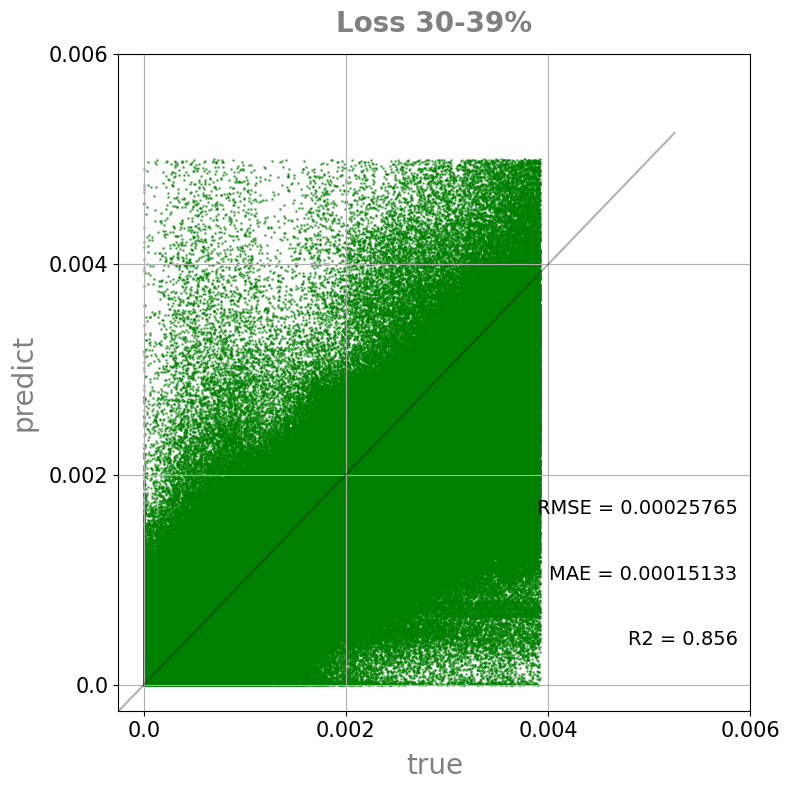

<AxesSubplot:title={'center':'Loss 30-39%'}, xlabel='true', ylabel='predict'>

In [29]:
# [0,1] 픽셀만 성능 검증
plt_gt = []
plt_res = []
from tqdm import trange

random_indices = random.sample(range(len(goci_files_list)), 10)

with warnings.catch_warnings():
    warnings.filterwarnings('error')
#     for i in tqdm(random_indices):
    for i in trange(len(goci_files_list)):
        goci_parts = goci_files_list[i].split('/')

        goci_file_name = goci_parts[-1] 

        mask_parts = mask_files_list[i].split('/')
        mask_file_name= mask_parts[-1]

        modis_parts = modis_files_list[i].split('/')
        modis_file_name = modis_parts[-1] 

        # print(goci_file_name, modis_file_name, mask_file_name)
        cnt = cnt+1;
        selected_goci = goci_files_list[i]
        selected_mask = mask_files_list[i]
        selected_modis = modis_files_list[i]
        restored_np = np.loadtxt(selected_goci, delimiter=',',dtype='float32')
        restored_np = restored_np/255.0
        mask = np.loadtxt(selected_mask, delimiter=',',dtype='float32')
        #mask = cv2.imread(selected_mask, cv2.IMREAD_GRAYSCALE)
        gt_np = np.loadtxt(selected_modis, delimiter=',',dtype='float32')
        gt_np = gt_np/255.0

        W = gt_np.shape[0]
        H = gt_np.shape[0]

        for w in range(W):
            for h in range(H):
                #only restoration area performance
                if mask[w,h]==0 and gt_np[w,h]!=0 and restored_np[w,h]!=0:
                    
                    if gt_np[w,h]<0 or restored_np[w,h] < 0 or restored_np[w,h] > 0.005 or gt_np[w,h]>0.005:
#                     if gt_np[w,h]<0 or restored_np[w,h] < 0 or restored_np[w,h] > 10 or gt_np[w,h]>10:
                        outlier = outlier+1
                        continue
                    else:
                        try:
                            loss = (gt_np[w,h]-restored_np[w,h])/gt_np[w,h]
                            plt_gt.append(gt_np[w, h])
                            plt_res.append(restored_np[w, h])

                        except Warning:
                            print(goci_file_name)
                            print(gt_np[w,h])
                            print(restored_np[w,h])
                            outlier = outlier+1
                            continue

                    if math.isinf(loss) or math.isnan(gt_np[w, h]) or math.isnan(restored_np[w, h]): 
                        continue

                    temp_mae = temp_mae + abs(gt_np[w, h]-restored_np[w, h])
                    #temp_mse = temp_mse + (gt_np[i,j]-restored_np[i,j])**2
                    temp_rmse = temp_rmse + (gt_np[w, h]-restored_np[w, h])**2
                    #temp_rmspe = temp_rmspe + loss**2
                    #temp_mape = temp_mape + abs(loss)
                    cloud_count = cloud_count+1



plt_gt = np.array(plt_gt)
plt_res = np.array(plt_res)


# plot_parity(save_path, plt_gt, plt_res, math.sqrt(temp_rmse/cloud_count), temp_mae/cloud_count)
plot_parity(filename = save_path,
            loss_rate = loss_rate,
            true=plt_gt,
            pred=plt_res,
            rmse_=math.sqrt(temp_rmse/cloud_count),
            mae_= temp_mae/cloud_count,
            title=f"Loss {loss_rate}-{loss_rate+9}%",           
)


In [5]:

print("MAE:", temp_mae/cloud_count)
print("MAPE:", temp_mape/cloud_count)
print("MSE", temp_mse/cloud_count)
print("RMSE:",math.sqrt(temp_rmse/cloud_count))
print("RMSPE:",math.sqrt(temp_rmspe/cloud_count))
#print("tmp : ", tmp)
print("cloud count: ", cloud_count)
print("count : ", cnt)    
print("outlier : ", outlier)     
    
    #################
    # Enter content #
    # val1 : selected_goci=
    
    # val2 : selected_modis
    #################

     


MAE: 0.00015531314758487726
MAPE: 0.0
MSE 0.0
RMSE: 0.00025924096704906706
RMSPE: 0.0
cloud count:  8827395
count :  932
outlier :  65499


100%|███████████████████████████████████████████| 10/10 [00:04<00:00,  2.42it/s]


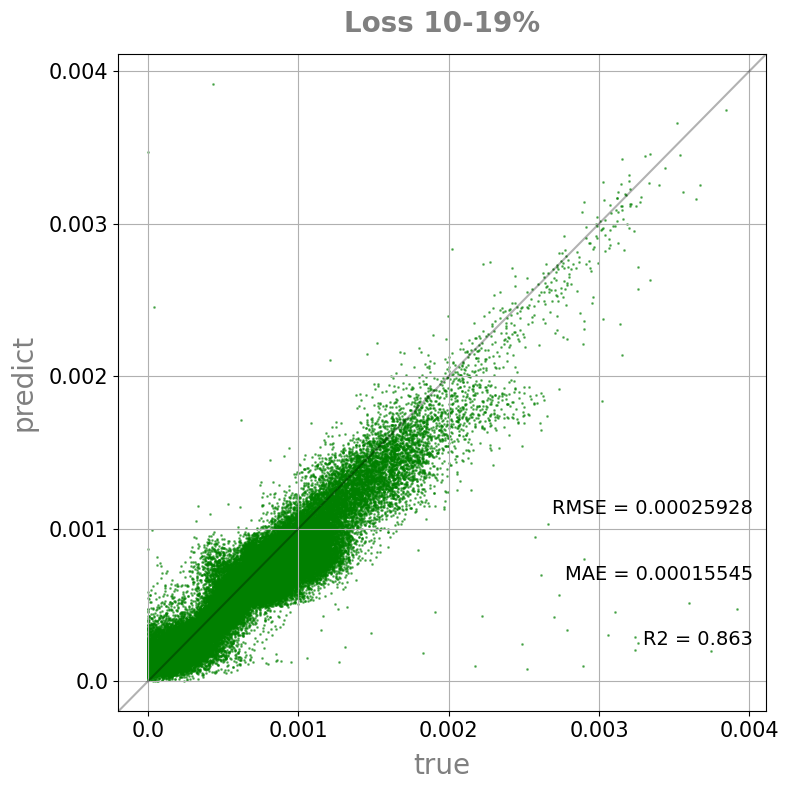

<AxesSubplot:title={'center':'Loss 10-19%'}, xlabel='true', ylabel='predict'>

In [12]:
# 랜덤한 샘플 n개만 추출해서 성능 검사
plt_gt = []
plt_res = []
from tqdm import trange

random_indices = random.sample(range(len(goci_files_list)), 10)

with warnings.catch_warnings():
    warnings.filterwarnings('error')
    for i in tqdm(random_indices):
#     for i in trange(len(goci_files_list)):
        goci_parts = goci_files_list[i].split('/')

        goci_file_name = goci_parts[-1] 

        mask_parts = mask_files_list[i].split('/')
        mask_file_name= mask_parts[-1]

        modis_parts = modis_files_list[i].split('/')
        modis_file_name = modis_parts[-1] 

        # print(goci_file_name, modis_file_name, mask_file_name)
        cnt = cnt+1;
        selected_goci = goci_files_list[i]
        selected_mask = mask_files_list[i]
        selected_modis = modis_files_list[i]
        restored_np = np.loadtxt(selected_goci, delimiter=',',dtype='float32')
        restored_np = restored_np/255.0
        mask = np.loadtxt(selected_mask, delimiter=',',dtype='float32')
        #mask = cv2.imread(selected_mask, cv2.IMREAD_GRAYSCALE)
        gt_np = np.loadtxt(selected_modis, delimiter=',',dtype='float32')
        gt_np = gt_np/255.0

        W = gt_np.shape[0]
        H = gt_np.shape[0]

        for w in range(W):
            for h in range(H):
                #only restoration area performance
                if mask[w,h]==0 and gt_np[w,h]!=0 and restored_np[w,h]!=0:
                    
                    if gt_np[w,h]<0 or restored_np[w,h] < 0 or restored_np[w,h] > 0.005 or gt_np[w,h]>0.005:
#                     if gt_np[w,h]<0 or restored_np[w,h] < 0 or restored_np[w,h] > 10 or gt_np[w,h]>10:
                        outlier = outlier+1
                        continue
                    else:
                        try:
                            loss = (gt_np[w,h]-restored_np[w,h])/gt_np[w,h]
                            plt_gt.append(gt_np[w, h])
                            plt_res.append(restored_np[w, h])

                        except Warning:
                            print(goci_file_name)
                            print(gt_np[w,h])
                            print(restored_np[w,h])
                            outlier = outlier+1
                            continue

                    if math.isinf(loss) or math.isnan(gt_np[w, h]) or math.isnan(restored_np[w, h]): 
                        continue

                    temp_mae = temp_mae + abs(gt_np[w, h]-restored_np[w, h])
                    #temp_mse = temp_mse + (gt_np[i,j]-restored_np[i,j])**2
                    temp_rmse = temp_rmse + (gt_np[w, h]-restored_np[w, h])**2
                    #temp_rmspe = temp_rmspe + loss**2
                    #temp_mape = temp_mape + abs(loss)
                    cloud_count = cloud_count+1



plt_gt = np.array(plt_gt)
plt_res = np.array(plt_res)


# plot_parity(save_path, plt_gt, plt_res, math.sqrt(temp_rmse/cloud_count), temp_mae/cloud_count)
plot_parity(filename = save_path,
            loss_rate = loss_rate,
            true=plt_gt,
            pred=plt_res,
            rmse_=math.sqrt(temp_rmse/cloud_count),
            mae_= temp_mae/cloud_count,
            title=f"Loss {loss_rate}-{loss_rate+9}%",
            save_file = False,
)


(0.0, 0.005)

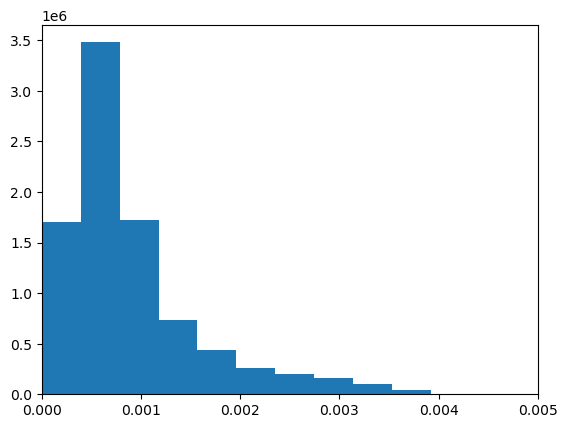

In [6]:
plt.hist(plt_gt)
plt.xlim(0, 0.005)

(0.0, 0.005)

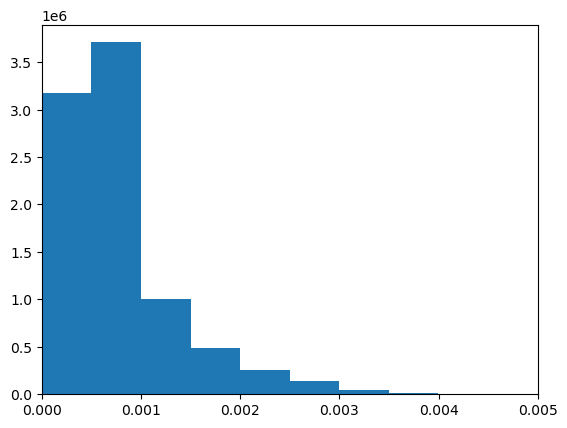

In [7]:
plt.hist(plt_res)
plt.xlim(0, 0.005)